# Introduction to OpenCV

In [1]:
import imutils
import cv2
import matplotlib.pyplot as plt

## 1. Reading images

In [2]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread('data/jp.png')
h, w, d = image.shape
print(f'width={w}, height={h}, depth={d}')

width=600, height=322, depth=3


## 2. Showing images

### Option 1: OpenCV

In [3]:
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to close it
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Option 2: Matplotlib
OpenCV stores images in BGR colour format, so we need to convert to RGB when using matplotlib

In [4]:
def imshow(im, title=None):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

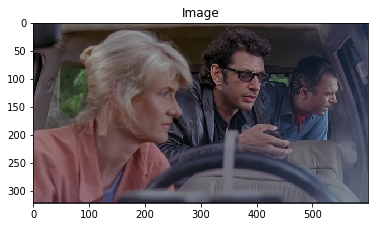

In [5]:
imshow(image, 'Image')

## 3. Image properties

### Pixel values

In [6]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
B, G, R = image[100, 50]
print(f'R={R}, G={G}, B={B}')

R=41, G=49, B=37


### Regions of interest

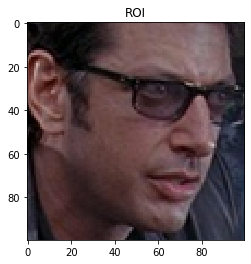

In [7]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]
imshow(roi, 'ROI')

## 4. Image transformations

### Resize

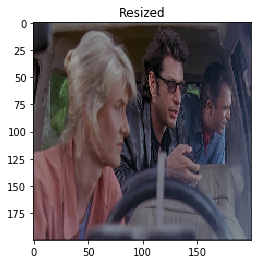

In [8]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
imshow(resized, 'Resized')

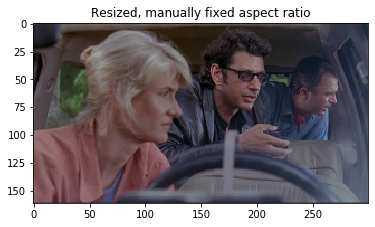

In [9]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
imshow(resized, 'Resized, manually fixed aspect ratio')

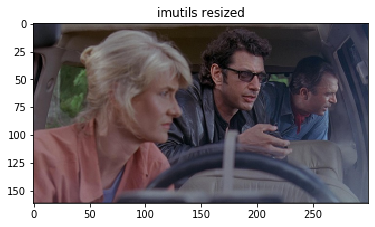

In [10]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
imshow(resized, 'imutils resized')

### Rotation

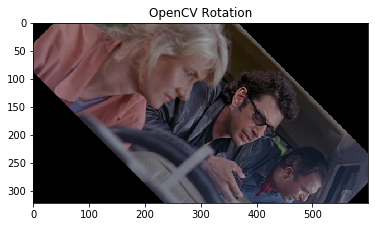

In [11]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
imshow(rotated, 'OpenCV Rotation')

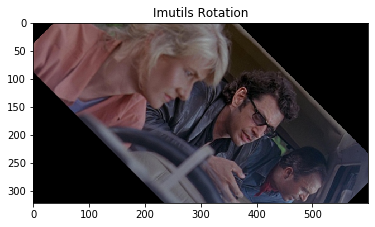

In [12]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
imshow(rotated, 'Imutils Rotation')

### Bounded rotation

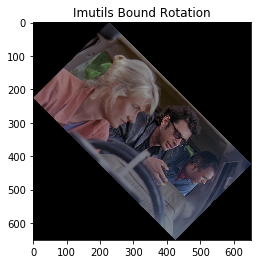

In [13]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, 45)
imshow(rotated, 'Imutils Bound Rotation')

### Gaussian blur

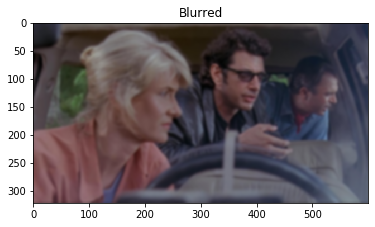

In [14]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
imshow(blurred, 'Blurred')

## 4. Annotations

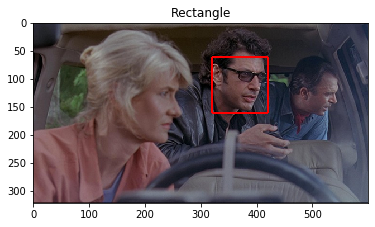

In [15]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
imshow(output, 'Rectangle')

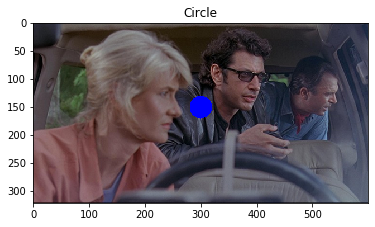

In [16]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
imshow(output, 'Circle')

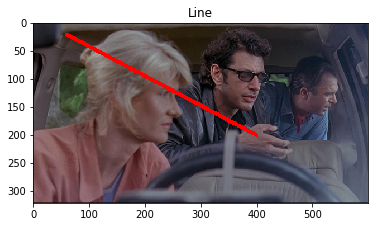

In [17]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
imshow(output, 'Line')

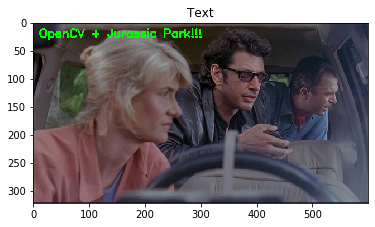

In [18]:
# draw green text on the image
output = image.copy()
cv2.putText(output, 'OpenCV + Jurassic Park!!!', (10, 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
imshow(output, 'Text')